<img src="../../img/logo_white_bkg_small.png" align="left" /> 
# Worksheet 3:  EDA Worksheet 
This worksheet covers concepts covered in the first half of Module 1 - Exploratory Data Analysis in One Dimension.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

There are many ways to accomplish the tasks that you are presented with, however you will find that by using the techniques covered in class, the exercises should be relatively simple. 

## Import the Libraries
For this exercise, we will be using:
* Pandas (http://pandas.pydata.org/pandas-docs/stable/)
* Numpy (https://docs.scipy.org/doc/numpy/reference/)
* Matplotlib (http://matplotlib.org/api/pyplot_api.html)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv( '../../data/dailybots.csv' )
#Look at a summary of the data
data.describe()

,hosts,orgs
count,4969.000000,4969.00000
mean,142.308110,15.31133
std,240.955294,21.15150
min,1.000000,1.00000
25%,10.000000,3.00000
50%,38.000000,7.00000
75%,187.000000,16.00000
max,2031.000000,122.00000


## Exercise 1: Summarize the Data
For this exercise, you are given a Series of random numbers creatively names `random_numbers`.  For the first exercise please do the following:

1.  Remove all the numbers less than 10
2.  Sort the series
3.  Calculate the Tukey 5 number summary for this dataset
4.  Count the number of even and odd numbers
5.  Find the five largest and 5 smallest numbers in the series

In [12]:
#Generate a series of random numbers between 1 and 100. 
random_numbers = pd.Series( np.random.randint(1, 100, 50) )

In [13]:
#Your code here...
#Filter the Series
random_numbers = random_numbers[random_numbers >= 10]

#Sort the Series
random_numbers.sort_values(inplace=True)

#Calculate the Tukey 5 Number Summary
random_numbers.describe()

#Count the number of even and odd numbers
even_numbers = random_numbers[random_numbers % 2 == 0].count() 
odd_numbers = random_numbers[random_numbers % 2 != 0].count() 
print( "Even numbers: " + str(even_numbers))
print( "Odd numbers: " + str(odd_numbers))

#Find the five largest and smallest numbers
print( "Smallest Numbers:")
print( random_numbers.head(5))

print( "Largest Numbers:")
print( random_numbers.tail(5))

Even numbers: 23
Odd numbers: 24
Smallest Numbers:
27    12
42    12
30    13
5     16
2     18
dtype: int64
Largest Numbers:
7     95
20    96
14    96
43    97
46    98
dtype: int64


## Exercise 2: Creating a Histogram
Using the random number Series create a histogram with 10 bins.

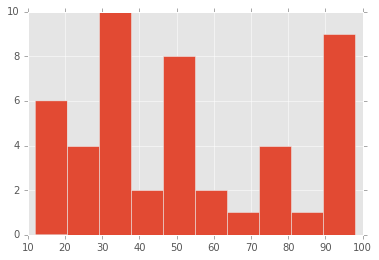

In [14]:
#Your code here...
random_numbers.hist(bins=10)

## Exercise 3:  Counting Values
You have been given a list of US phone numbers.  The area code is the first three digits.  Your task is to produce a summary of how many times each area code appears in the list. To do this you will need to:
1. Extract the area code from each phone number
2. Count the unique occurances.

In [16]:
phone_numbers = [
'(833) 759-6854',
'(811) 268-9951',
'(855) 449-4648',
'(833) 212-2929',
'(833) 893-7475',
'(822) 346-3086',
'(844) 259-9074',
'(855) 975-8945',
'(811) 385-8515',
'(811) 523-5090',
'(844) 593-5677',
'(833) 534-5793',
'(899) 898-3043',
'(833) 662-7621',
'(899) 146-8244',
'(822) 793-4965',
'(822) 641-7853',
'(833) 153-7848',
'(811) 958-2930',
'(822) 332-3070',
'(833) 223-1776',
'(811) 397-1451',
'(844) 096-0377',
'(822) 000-0717',
'(899) 311-1880']

In [18]:
#Your code here...
phone_number_series = pd.Series(phone_numbers)
area_codes = phone_number_series.str.slice(1,4)
area_codes2 = phone_number_series.str.extract( '\((\d{3})\)', expand=False)
area_codes2.value_counts()

833    7
811    5
822    5
899    3
844    3
855    2
dtype: int64

## Exercise 4:  Putting it all together: Bot Analysis
First you're going to want to create a data frame from the `dailybots.csv` file which can be found in the `data` directory.  You should be able to do this with the `pd.read_csv()` function.  Take a minute to look at the dataframe because we are going to be using it for to answer several different questions.

In [4]:
data = pd.read_csv( '../../data/dailybots.csv' )
data.head()

,date,botfam,industry,hosts,orgs
0,2016-06-01,Bedep,Education,88,33
1,2016-06-01,Bedep,Finance,387,17
2,2016-06-01,Bedep,Government/Politics,430,42
3,2016-06-01,Bedep,Healthcare/Wellness,42,19
4,2016-06-01,Bedep,Manufacturing,184,18


In [5]:
data.describe()

,hosts,orgs
count,4969.000000,4969.00000
mean,142.308110,15.31133
std,240.955294,21.15150
min,1.000000,1.00000
25%,10.000000,3.00000
50%,38.000000,7.00000
75%,187.000000,16.00000
max,2031.000000,122.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 5 columns):
date        4969 non-null object
botfam      4969 non-null object
industry    4969 non-null object
hosts       4969 non-null int64
orgs        4969 non-null int64
dtypes: int64(2), object(3)
memory usage: 194.2+ KB


In [7]:
data['botfam'].value_counts()

Ramnit         540
Zeus           540
Sality         540
ConfickerAB    540
zeroaccess     538
Bedep          535
Necurs         511
Zusy           498
PushDo         418
Olmasco        309
Name: botfam, dtype: int64

### Part 1: Which industry sees the most Ramnit infections? Least?

Count the number of infected days for "Ramnit" in each industry industry. 
How: 
1.  First filter the data to remove all the infections we don't care about
2.  Aggregate the data on the column of interest. HINT:  You might want to use the `groupby()` function
3.  Add up the results 

In [8]:
grouped_df = data[data.botfam == "Ramnit"].groupby(['industry'])
grouped_df.sum()

,hosts,orgs
industry,,
Education,7492,3949
Finance,2281,1357
Government/Politics,4484,448
Healthcare/Wellness,544,473
Manufacturing,46303,1155
Retail,17649,558


### Part 2: Calculate the min, max, median and mean infected orgs for each bot family, sort by median
In this exercise, you are asked to calculate the min, max, median and mean of infected orgs for each bot family sorted by median.  HINT:
1.  Using the `groupby()` function, create a grouped data frame
2.  You can do this one metric at a time OR you can use the .agg() function. You might want to refer to the documentation here:  http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once
3.  Sort the values (HINT HINT) by the median column

In [9]:
group2 = data[['botfam','orgs']].groupby( ['botfam'])
summary = group2.agg([np.min, np.max, np.mean, np.median, np.std])
summary.sort_values( [('orgs', 'median')], ascending=False)

orgs                                  
            amin amax       mean median        std
botfam                                            
ConfickerAB   27  122  63.035185   56.5  25.619679
Sality         2   43  15.909259   12.0   9.961946
Necurs         1  115  16.739726   11.0  16.644046
Ramnit         1   60  14.703704    9.0  14.485780
Zeus           1   36   9.988889    8.0   6.687004
Bedep          1   42   8.016822    6.0   6.192125
zeroaccess     1   19   5.481413    5.0   2.999787
Zusy           1   20   5.279116    4.0   4.204578
PushDo         1   12   2.882775    2.0   2.535719
Olmasco        1    6   1.592233    1.0   0.722148

### Part 3: Which date had the total most bot infections and how many infections on that day?
For the next step, aggregate and sum the number of infections (hosts) by date.  Once you've done that, the next step is to sort in descending order. 

In [10]:
df3 = data[['date','hosts']].groupby('date').sum()
df3.sort_values(by='hosts', ascending=False).head(10)

,hosts
date,
2016-06-02,11352
2016-06-08,10716
2016-06-09,10476
2016-06-07,10383
2016-06-03,10336
2016-06-06,10125
2016-06-10,10106
2016-06-14,9820
2016-06-15,9738


### Part 4: Plot the daily infected hosts for Necurs, Ramnit and PushDo
For the final step, you're going to plot the daily infected hosts for three infection types.  In order to do this, you'll need to do the following steps:
1.  Filter the data to remove the botfamilies we don't care about. 
2.  Use `groupby()` to aggregate the data by date and family, then sum up the hosts in each group
3.  Plot the data.  Hint:  You might want to use the `unstack()` function to prepare the data for plotting. 
4.  Use the `plot()` method to plot the results. 

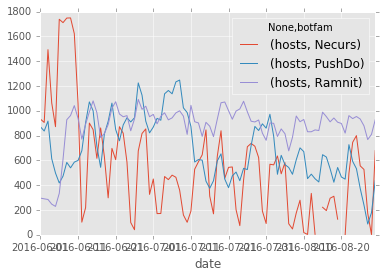

In [11]:
filteredData = data[ data['botfam'].isin(['Necurs', 'Ramnit', 'PushDo']) ][['date', 'botfam', 'hosts']]
groupedFilteredData = filteredData.groupby( ['date', 'botfam']).sum()
groupedFilteredData.unstack(level=1).plot(kind='line', subplots=False)